In [ ]:
df= pd.read_csv("/content/SuperBowl Yearwise Viewership.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        58 non-null     int64  
 1   Total Viewers(In Millions)  58 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt

df = pd.read_csv('SuperBowl Yearwise Viewership.csv')
df = df[::-1].reset_index(drop=True)
time_series = pd.Series(df['Total Viewers(In Millions)'].values, index=pd.to_datetime(df['Year'], format='%Y'))
model = ExponentialSmoothing(time_series)
model_fit = model.fit()
forecast = model_fit.forecast(steps=1)
print(f"Predicted viewership for 2024: {forecast.values[0]:.2f} million")


Predicted viewership for 2024: 122.91 million


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Forecasted viewership for 2024 (ARIMA): 123.41 million


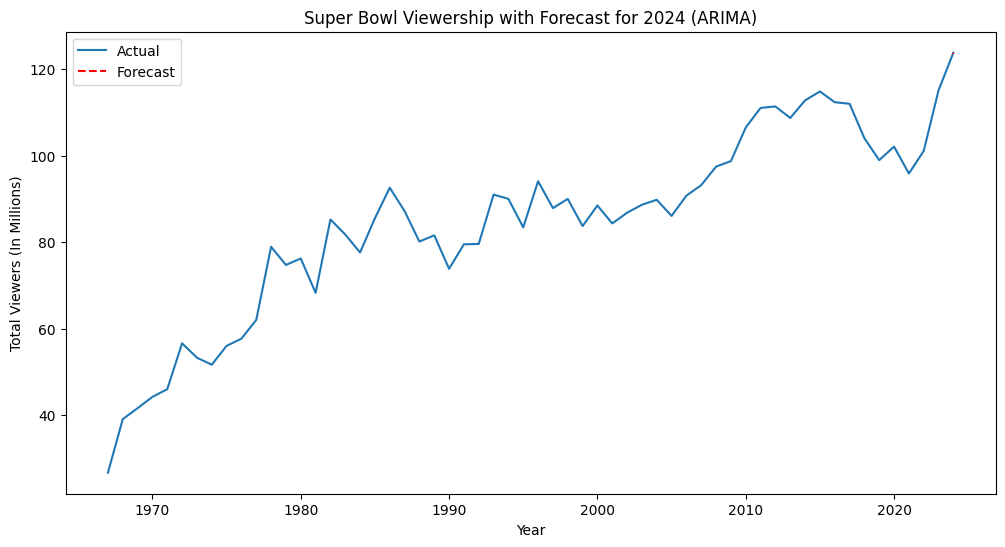

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('SuperBowl Yearwise Viewership.csv')
df = df[::-1].reset_index(drop=True)
time_series = pd.Series(df['Total Viewers(In Millions)'].values, index=pd.to_datetime(df['Year'], format='%Y'))
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()
forecast_2024 = model_fit.forecast(steps=1)
print(f"Forecasted viewership for 2024 (ARIMA): {forecast_2024.values[0]:.2f} million")
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot([time_series.index[-1], pd.to_datetime(2024, format='%Y')], [time_series.values[-1], forecast_2024.values[0]], 'r--', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Viewers (In Millions)')
plt.title('Super Bowl Viewership with Forecast for 2024 (ARIMA)')
plt.legend()
plt.show()


Forecasted viewership for 2024 (Linear Regression): 117.24 million


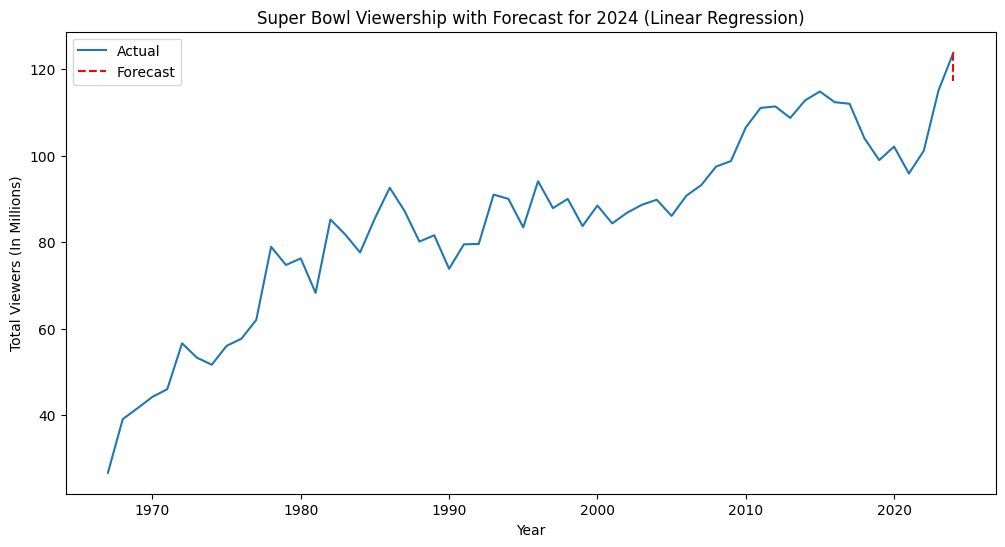

In [ ]:
from sklearn.linear_model import LinearRegression
df = df[::-1].reset_index(drop=True)
time_series = pd.Series(df['Total Viewers(In Millions)'].values, index=pd.to_datetime(df['Year'], format='%Y'))
X = time_series.index.year.values.reshape(-1, 1)
y = time_series.values
model = LinearRegression()
model.fit(X, y)
forecast_2024 = model.predict([[2024]])
print(f"Forecasted viewership for 2024 (Linear Regression): {forecast_2024[0]:.2f} million")
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot([time_series.index[-1], pd.to_datetime(2024, format='%Y')], [time_series.values[-1], forecast_2024[0]], 'r--', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Viewers (In Millions)')
plt.title('Super Bowl Viewership with Forecast for 2024 (Linear Regression)')
plt.legend()
plt.show()
